In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
letters, years = [], []
fn = "ltcs180_textbook/03-vector-space-model/data/chain-letters.csv"

with open(fn) as f:
    reader = csv.DictReader(f)
    for row in reader:
        letters.append(row["letter"])
        years.append(int(row["year"]))

## Moderate Exercises
1. The length of the chain letters has changed considerably over the years.
Compute the average length of letters from before 1950, and compare that
to the average length of letters after 1950. (Hint: convert the list of years
into a NumPy array, and use boolean indexing to slice the document-term
matrix.)

In [3]:
# np_letters = np.array(letters)
np_years = np.array(years)

before_1950 = np.array(letters)[np_years < 1950]
after_1950 = np.array(letters)[np_years >= 1950]

avg_length_before_1950 = np.mean([len(letter) for letter in before_1950])
avg_length_after_1950 = np.mean([len(letter) for letter in after_1950])

print("Average length of letters before 1950:", avg_length_before_1950)
print("Average length of letters after 1950:", avg_length_after_1950)

Average length of letters before 1950: 687.567944250871
Average length of letters after 1950: 1914.119850187266



2. Make a scatter plot to visualize the change in letter length over time. Add
a label to the X and Y axis, and adjust the opacity of the data points for
better visibility. Around what year do the letters suddenly become much
longer?


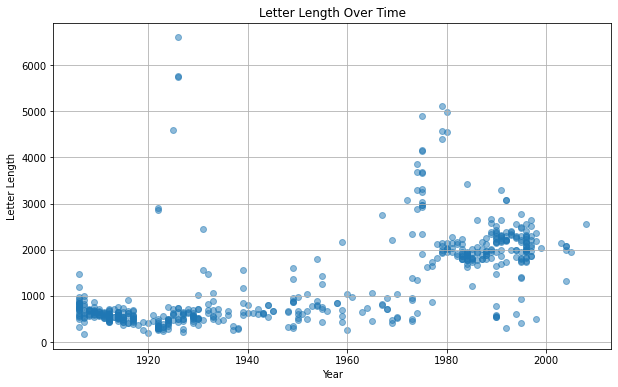

In [4]:
letter_lengths = np.array([len(letter) for letter in letters])

plt.figure(figsize=(10, 6))
plt.scatter(years, letter_lengths, alpha=0.5)
plt.title("Letter Length Over Time")
plt.xlabel("Year")
plt.ylabel("Letter Length")
plt.grid(True)
plt.show()

3. Not only the length of the letters has changed, but also the contents
of the letters. Early letters in the corpus still have strong religious Exploring Texts Using the Vector Space Model • 113
undertones,2 while newer examples put greater emphasis on superstitious
beliefs. VanArsdale (2019) points to an interesting development of the
postscript “It works!” The first attestation of this phrase is in 1979, but
in a few years’ time, all succeeding letters end with this statement. Extract
and print the summed frequency of the words Jesus and works in letters
written before and written after 1950

In [5]:
%pip install nltk;

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import nltk
import nltk.tokenize
import re
import collections

In [7]:
nltk.download('punkt', quiet=True)

PUNCT_RE = re.compile(r'[^\w\s]+$')

def is_punct(string):
    """Check if STRING is a punctuation marker or a sequence of
    punctuation markers.
    Arguments:
    string (str): a string to check for punctuation markers.
    Returns:
    bool: True if string is a (sequence of) punctuation marker(s),
    False otherwise.
    """
    return PUNCT_RE.match(string) is not None

def preprocess_text(text, language, lowercase=True):
    if lowercase:
        text = text.lower()
    tokens = nltk.tokenize.word_tokenize(text, language=language)
    tokens = [token for token in tokens if not is_punct(token)]
    return tokens

def create_vocab(corpus):
    vocabulary = collections.Counter()
    for l in corpus:
        vocabulary.update(preprocess_text(l, 'english'))
    return vocabulary

In [8]:
before_vocab = create_vocab(before_1950)
after_vocab = create_vocab(after_1950)

In [9]:
print(f"Before 1950 - Jesus: {before_vocab['jesus']}, Works: {before_vocab['works']}")
print(f"After 1950 - Jesus: {after_vocab['jesus']}, Works: {after_vocab['works']}")

Before 1950 - Jesus: 167, Works: 1
After 1950 - Jesus: 4, Works: 145
